In [707]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [708]:
sl = pd.read_csv('../Cyber_salaries.csv')

In [709]:
sl.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Information Security Officer,68000,EUR,72762,DE,100,DE,S
1,2022,SE,FT,Security Officer,123400,USD,123400,US,0,US,M
2,2022,SE,FT,Security Officer,88100,USD,88100,US,0,US,M
3,2022,SE,FT,Security Engineer,163575,USD,163575,US,100,US,M
4,2022,SE,FT,Security Engineer,115800,USD,115800,US,100,US,M


In [714]:
sl

KeyError: "None of [Index(['Information Security Officer', 'Security Officer', 'Security Officer',\n       'Security Engineer', 'Security Engineer',\n       'Penetration Testing Engineer', 'Security Analyst', 'Security Analyst',\n       'Security Engineer', 'Security Engineer',\n       ...\n       'Application Security Engineer', 'Information Security Specialist',\n       'Application Security Engineer', 'Cyber Security Analyst',\n       'Ethical Hacker', 'Cyber Security Analyst',\n       'Information Security Manager', 'Penetration Testing Engineer',\n       'Information Security Analyst', 'Threat Intelligence Analyst'],\n      dtype='object', length=1349)] are in the [columns]"

In [669]:
sl.size

14839

In [670]:
sl.shape

(1349, 11)

In [671]:

print("size:",  sl.size)
print("shape:", sl.shape)
sl.describe().T

size: 14839
shape: (1349, 11)


,count,mean,std,min,25%,50%,75%,max
work_year,1349.0,2021.368421,7.112360e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,1349.0,528824.761305,1.361367e+07,1740.0,80000.0,120000.0,160080.0,500000000.0
salary_in_usd,1349.0,121578.622683,6.897295e+04,2000.0,75000.0,115000.0,152000.0,899920.0
remote_ratio,1349.0,72.238695,3.935533e+01,0.0,50.0,100.0,100.0,100.0


In [672]:
sl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1349 non-null   int64 
 1   experience_level    1349 non-null   object
 2   employment_type     1349 non-null   object
 3   job_title           1349 non-null   object
 4   salary              1349 non-null   int64 
 5   salary_currency     1349 non-null   object
 6   salary_in_usd       1349 non-null   int64 
 7   employee_residence  1349 non-null   object
 8   remote_ratio        1349 non-null   int64 
 9   company_location    1349 non-null   object
 10  company_size        1349 non-null   object
dtypes: int64(4), object(7)
memory usage: 116.1+ KB


In [673]:
info_t = pd.DataFrame(index=sl.columns)
info_t['data_type'] = sl.dtypes
info_t['total_null_count'] = sl.isnull().sum()
info_t['total_unique_count'] = sl.nunique()
info_t

,data_type,total_null_count,total_unique_count
work_year,int64,0,3
experience_level,object,0,4
employment_type,object,0,4
job_title,object,0,87
salary,int64,0,416
salary_currency,object,0,21
salary_in_usd,int64,0,615
employee_residence,object,0,60
remote_ratio,int64,0,3
company_location,object,0,57


In [674]:
sl.drop(['salary','salary_currency'],inplace = True, axis = 1)

In [675]:
sl.head(1)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Information Security Officer,72762,DE,100,DE,S


In [676]:
temp = pd.DataFrame(index=sl.columns)
temp['data_type'] = sl.dtypes
temp['null_count'] = sl.isnull().sum()
temp['unique_count'] = sl.nunique()
temp

,data_type,null_count,unique_count
work_year,int64,0,3
experience_level,object,0,4
employment_type,object,0,4
job_title,object,0,87
salary_in_usd,int64,0,615
employee_residence,object,0,60
remote_ratio,int64,0,3
company_location,object,0,57
company_size,object,0,3


In [638]:
#sl.drop(['employment_type'],inplace = True, axis = 1)

In [639]:
#sl.drop(['company_size'],inplace = True, axis = 1)

In [677]:
print(sl['work_year'].value_counts())
print(sl['experience_level'].value_counts())
print(sl['remote_ratio'].value_counts())
print(sl['company_size'].value_counts())
print(sl['employment_type'].value_counts())


2022    681
2021    484
2020    184
Name: work_year, dtype: int64
SE    622
MI    433
EN    218
EX     76
Name: experience_level, dtype: int64
100    851
0      251
50     247
Name: remote_ratio, dtype: int64
L    798
M    459
S     92
Name: company_size, dtype: int64
FT    1326
CT      11
PT       9
FL       3
Name: employment_type, dtype: int64


In [678]:
sl.drop(['employment_type'],inplace = True, axis = 1)

<AxesSubplot:xlabel='remote_ratio', ylabel='count'>

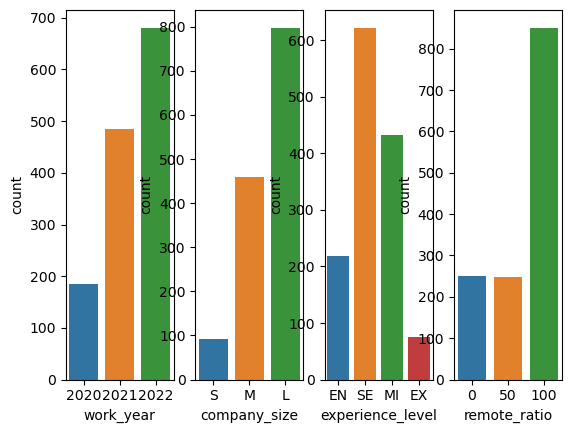

In [679]:
fig, axs = plt.subplots(1,4)

sns.countplot(sl['work_year'],ax=axs[0])
sns.countplot(sl['company_size'],ax=axs[1])
sns.countplot(sl['experience_level'],ax=axs[2])
sns.countplot(sl['remote_ratio'],ax=axs[3])

<AxesSubplot:xlabel='company_size', ylabel='count'>

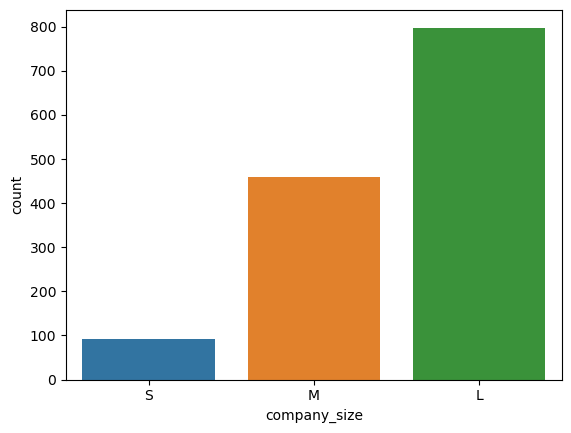

In [642]:
sns.countplot(sl['company_size'])

<AxesSubplot:xlabel='experience_level', ylabel='count'>

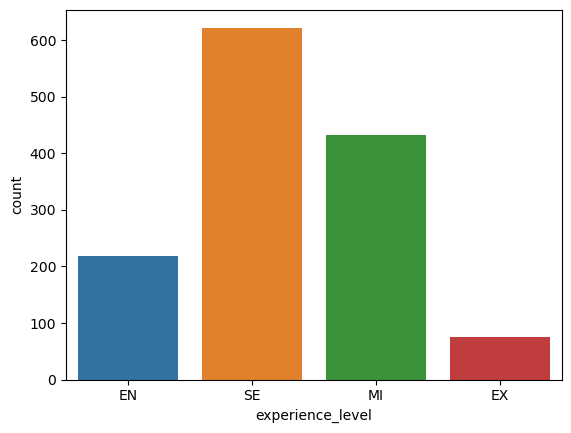

In [643]:
sns.countplot(sl['experience_level'])

<AxesSubplot:xlabel='remote_ratio', ylabel='count'>

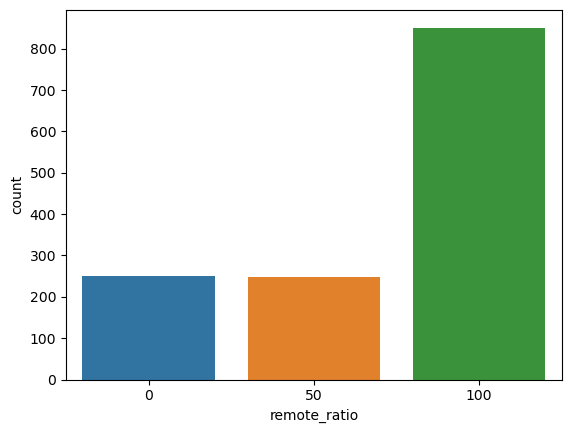

In [644]:
sns.countplot(sl['remote_ratio'])

<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

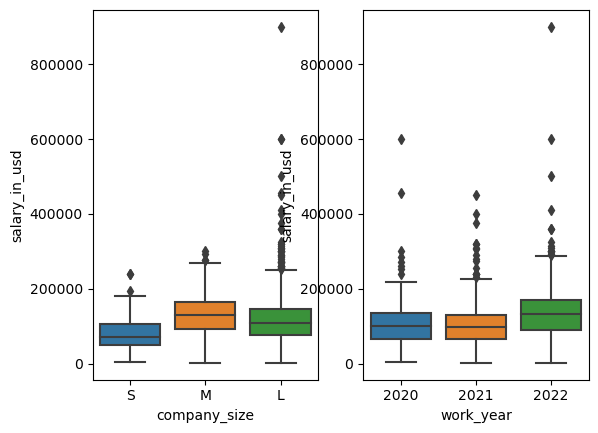

In [645]:
fig, axs = plt.subplots(1,2)
sns.boxplot(sl['company_size'],sl['salary_in_usd'],ax=axs[0])
sns.boxplot(sl['work_year'],sl['salary_in_usd'],ax = axs[1])

<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

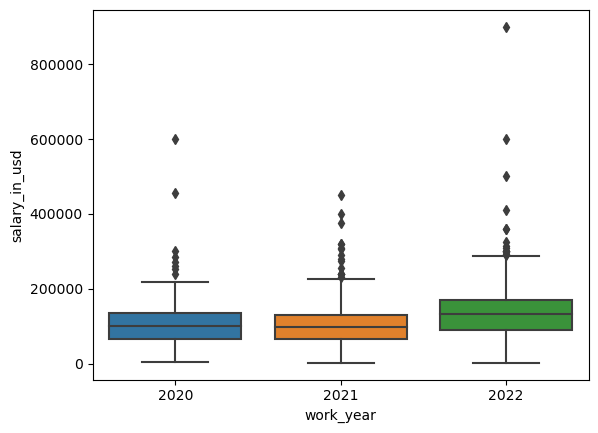

In [646]:
sns.boxplot(sl['work_year'],sl['salary_in_usd'])

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

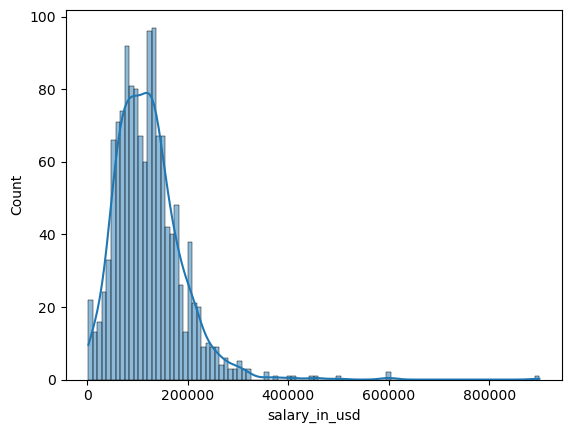

In [685]:
sns.histplot(sl['salary_in_usd'],kde = True, bins = 100)

<AxesSubplot:ylabel='job_title'>

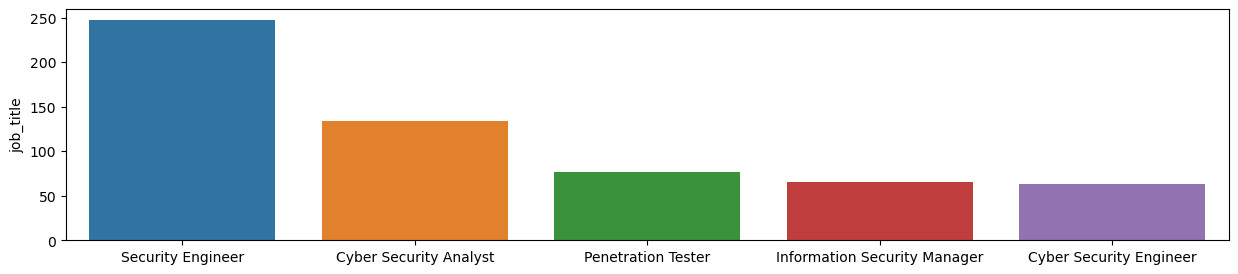

In [656]:
plt.figure(figsize=(15,3))
sl1=pd.DataFrame(sl['job_title'].value_counts().head(5))
sns.barplot(sl1.index,sl1['job_title'])

<AxesSubplot:ylabel='company_location'>

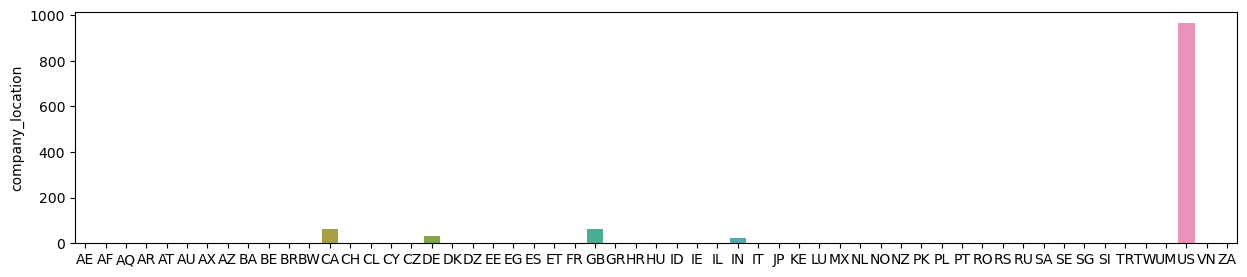

In [706]:
plt.figure(figsize=(15,3))
sl2=pd.DataFrame(sl['company_location'].value_counts().head(5))
sns.barplot(sl2.index,sl2['company_location'])

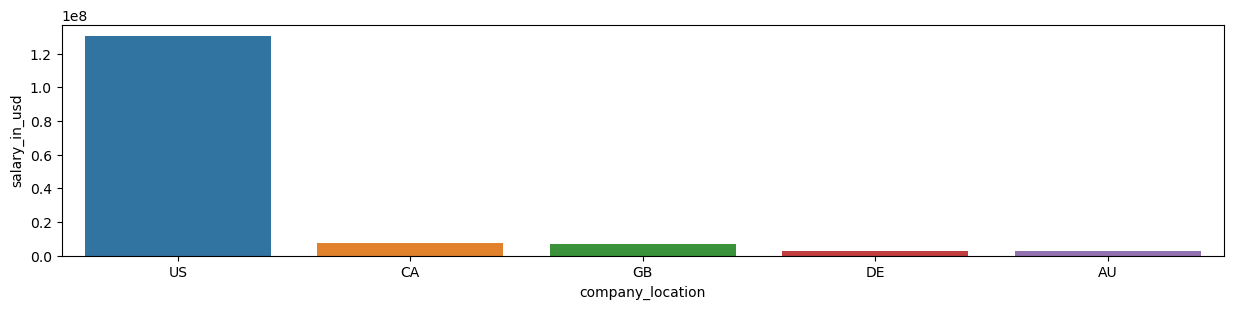

In [417]:
plt.figure(figsize=(15,3))
sl1=pd.DataFrame(sl.groupby('company_location')["salary_in_usd"].sum().sort_values(ascending=False).head(5))
sns.barplot(sl1.index,sl1['salary_in_usd']);

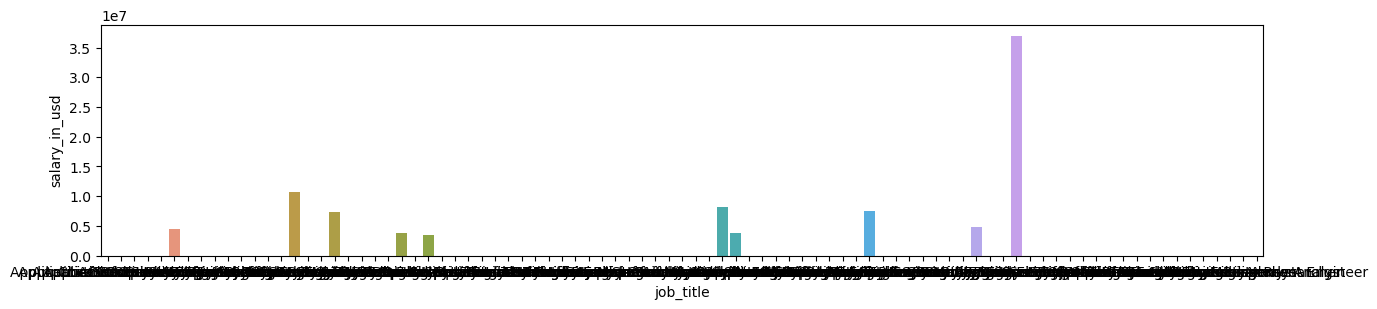

In [690]:
plt.figure(figsize=(15,3))
sl1=pd.DataFrame(sl.groupby('job_title')["salary_in_usd"].sum().sort_values(ascending=False).head(10))
sns.barplot(sl1.index,sl1['salary_in_usd']);

<AxesSubplot:xlabel='salary_in_usd'>

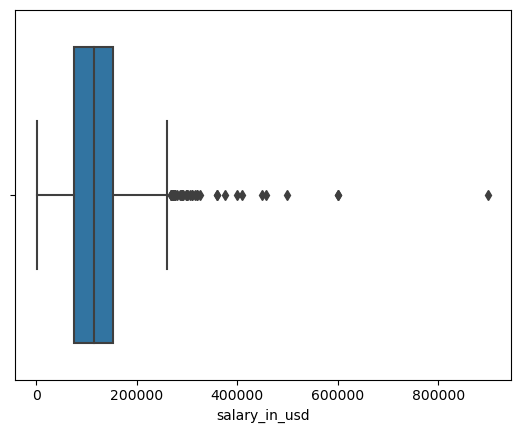

In [419]:
sns.boxplot(sl['salary_in_usd'])
#outliers datalar

In [420]:
out=[]
def outlier(x):
    threshold = 3
    mean = np.mean(x)
    std = np.std(x)
    for i in x:
        z = (i-mean)/std
        if np.abs(z)>threshold:
            out.append(i)
    return out

In [421]:
lst = outlier(sl['salary_in_usd'])
print(lst)
len(lst)

[360000, 410000, 899920, 500000, 360000, 600000, 375000, 600000, 450000, 400000, 456621]


11

In [422]:
Q1 = np.percentile(sl["salary_in_usd"], 25, interpolation = "midpoint")
Q3 = np.percentile(sl['salary_in_usd'], 75, interpolation = "midpoint")
IQR = Q3-Q1
print('Old Shape: ',sl.shape)
# lower line
upper =np.where(sl["salary_in_usd"] >= (Q3+1.5*IQR))
# upper line
lower = np.where(sl['salary_in_usd'] <= (Q1-1.5*IQR))
sl.drop(upper[0],inplace=True)
sl.drop(lower[0],inplace=True)
print('Current Shape', sl.shape)

Old Shape:  (1349, 8)
Current Shape (1311, 8)


In [423]:
# upper bound
upper =np.where(sl["salary_in_usd"] >= (Q3+1.5*IQR))
# lower bound
lower = np.where(sl['salary_in_usd'] <= (Q1-1.5*IQR))

In [424]:
sl.drop(upper[0],inplace=True)
sl.drop(lower[0],inplace=True)
print('New Shape', sl.shape)

New Shape (1311, 8)


<AxesSubplot:xlabel='salary_in_usd'>

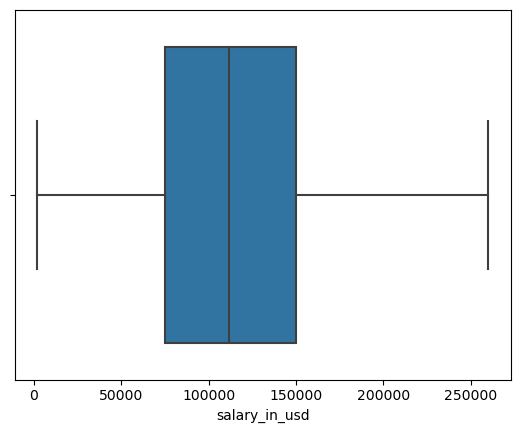

In [425]:
sns.boxplot(sl["salary_in_usd"])

In [426]:
sl.isnull().sum()

work_year             0
experience_level      0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [682]:
temp = pd.DataFrame(index=sl.columns)
temp['data_type'] = sl.dtypes
temp['null_count'] = sl.isnull().sum()
temp['unique_count'] = sl.nunique()
temp

,data_type,null_count,unique_count
work_year,int64,0,3
experience_level,object,0,4
job_title,object,0,87
salary_in_usd,int64,0,615
employee_residence,object,0,60
remote_ratio,int64,0,3
company_location,object,0,57
company_size,object,0,3


In [681]:
sl.dtypes

work_year              int64
experience_level      object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [683]:
for label, content in sl.items():
    if pd.api.types.is_string_dtype(content):
        sl[label] = content.astype('category').cat.as_ordered()

In [684]:
sl.dtypes

work_year                int64
experience_level      category
job_title             category
salary_in_usd            int64
employee_residence    category
remote_ratio             int64
company_location      category
company_size          category
dtype: object

In [431]:
for label,content in sl.items():
    sl[label] = pd.Categorical(content).codes+1
sl

,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,3,1,47,208,18,3,18,3
1,3,4,71,400,58,1,55,2
2,3,4,71,274,58,1,55,2
3,3,4,68,483,58,3,55,2
4,3,4,68,372,58,3,55,2
...,...,...,...,...,...,...,...,...
1344,1,3,14,306,5,2,6,2
1345,2,4,46,252,26,2,26,1
1346,2,4,58,408,58,3,55,1
1347,2,3,40,134,26,3,26,1


In [432]:
print(sl["salary_in_usd"].min())
print(sl["salary_in_usd"].max())

1
586


In [433]:
sl["salary_in_usd"].max()

586

In [436]:
from sklearn.model_selection import train_test_split

In [437]:
X = sl.drop('salary_in_usd', axis = 1)
y = sl['salary_in_usd']

In [438]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

In [521]:
from sklearn.metrics import mean_absolute_error as mean_absolute_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

In [522]:
lr = LinearRegression()

In [523]:
lr.fit(X_train,y_train)

LinearRegression()

In [533]:
train_predict = lr.predict(X_train)
k = mean_absolute_error(train_predict, y_train)
print('Training Mean Absolute Error for Linear Regression Model is',k)

Training Mean Absolute Error for Linear Regression Model is 96.54084211505389


In [534]:
test_predict = lr.predict(X_test)
k = mean_absolute_error(test_predict, y_test)
print('Testing Mean Absoulte Error for Linear Regression Model is', k)

Testing Mean Absoulte Error for Linear Regression Model is 98.2597820826245


In [535]:
lr_pred = lr.predict(X_test)
print("Mean Squared Error for Linear Regression Model is", np.sqrt(mse(y_test,lr_pred)))

Mean Squared Error for Linear Regression Model is 124.5333771529128


In [468]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_jobs=-1)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [543]:
train_predict = rfr.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error for Random Forest Regression is:',k)

Training Mean Absolute Error for Random Forest Regression is: 42.03876327551028


In [542]:
test_predict = rfr.predict(X_test)
k = mae(test_predict, y_test)
print('Testing Mean Absolute Error for Random Forest Regression is: ',k)

Testing Mean Absolute Error for Random Forest Regression is:  85.014923148833


In [541]:
rfr_pred = rfr.predict(X_test)
print("Mean Squared Error for Random Forest Regression is", np.sqrt(mse(y_test,rfr_pred)))

Mean Squared Error for Random Forest Regression is 109.13021038090048


In [ ]:
knr_pred = knr.predict(X_test)

In [471]:
from sklearn.neighbors import KNeighborsRegressor

In [473]:
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [539]:
train_predict = knr.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error for K Neighbors Regression is:',k)

Training Mean Absolute Error for K Neighbors Regression is: 77.24350797266513


In [540]:
test_predict = knr.predict(X_test)
k = mae(test_predict, y_test)
print('Testing Mean Absolute Error for K Neighbors Regression is: ',k)

Testing Mean Absolute Error for K Neighbors Regression is:  90.75196304849884


In [538]:
knr_pred = knr.predict(X_test)
print("Mean Squared Error for K Neigbors Regression Model is",np.sqrt(mse(y_test,knr_pred)))

Mean Squared Error for K Neigbors Regression Model is 117.01300217917594


In [516]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [546]:
train_predict = dtr.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error for Decision Tree Regression is: ',k)

Training Mean Absolute Error for Decision Tree Regression is:  24.00161392644308


In [545]:
test_predict = dtr.predict(X_test)
k = mae(test_predict, y_test)
print('Testing Mean Absolute Error for Decision Tree Reggression is: ',k)

Testing Mean Absolute Error for Decision Tree Reggression is:  99.77537333080058


In [544]:
dtr_pred = dtr.predict(X_test)
print("Mean Squared Error for Decision Tree Regression Model is",np.sqrt(mse(y_test,dtr_pred)))

Mean Squared Error for Decision Tree Regression Model is 133.43739110544476


In [487]:
rfr_pred = rfr.predict(X_test)

In [497]:
pred
lr_pred = lr.predict(X_test)
dtr_pred = dtr.predict(X_test)
knr_pred = knr.predict(X_test)

In [484]:
from sklearn.metrics import mean_squared_error as mse

In [491]:
np.sqrt(mse(y_test,rfr_pred))

109.13021038090048

In [493]:
np.sqrt(mse(y_test,lr_pred))

124.5333771529128

In [496]:
np.sqrt(mse(y_test,dtr_pred))

134.07877816344916

In [498]:
np.sqrt(mse(y_test,knr_pred))

117.01300217917594

In [520]:
knr.n_neighbors

5

In [593]:
#tuning-hiperparametre ayarlaması

In [589]:
rfr_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}

In [590]:
rfr_cv_model = GridSearchCV(rfr, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [592]:
from sklearn.model_selection import GridSearchCV


In [556]:
rfr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [557]:
rfr_cv_model.best_params_

{'max_depth': 9, 'max_features': 3, 'n_estimators': 500}

In [558]:
rfr_tuned = RandomForestRegressor(max_depth=9,
                                 max_features=3, 
                                 n_estimators = 500)

In [559]:
rfr_tuned.fit(X_train,y_train)

RandomForestRegressor(max_depth=9, max_features=3, n_estimators=500)

In [594]:
y_pred = rf_tuned.predict(X_test)
print("Tuning mean squared Error for Random Forest Regression Model is", np.sqrt(mse(y_test,y_pred)))

Tuning mean squared Error for Random Forest Regression Model is 101.31464736022149


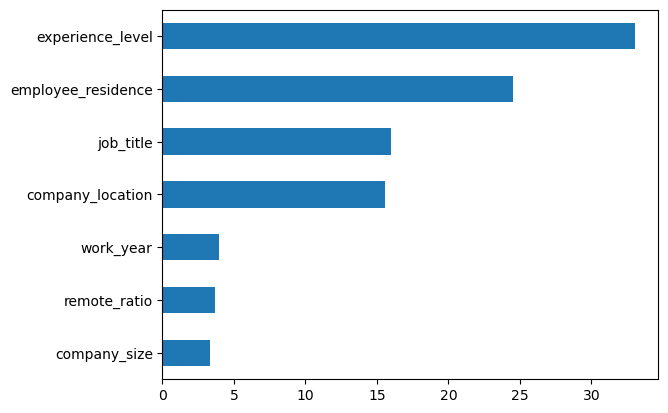

In [588]:
model_ranks = pd.Series(rf_tuned.feature_importances_*100,
                        index = X_train.columns,name = 'Importance').sort_values(ascending=True,inplace=False) 
ax = model_ranks. plot(kind = "barh")

In [692]:
    from sklearn.metrics import r2_score

In [700]:
r2_score(y_test, y_pred)

0.5684172524675366